2017-18 nba season player stats

In [252]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [253]:
#load data
df=pd.read_csv('/content/2017-18_NBA_salary.csv')

In [254]:
# view dataframe
df.head()

,Player,Salary,NBA_Country,NBA_DraftNumber,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Zhou Qi,815615,China,43,22,HOU,16,87,0.6,0.303,0.593,0.370,6.5,16.8,11.7,1.5,1.1,6.8,18.2,19.5,-0.4,0.1,-0.2,-0.121,-10.6,0.5,-10.1,-0.2
1,Zaza Pachulia,3477600,Georgia,42,33,GSW,66,937,16.8,0.608,0.004,0.337,11.0,25.0,18.5,15.4,1.9,1.3,19.3,17.2,1.7,1.4,3.1,0.160,-0.6,1.3,0.8,0.7
2,Zach Randolph,12307692,USA,19,36,SAC,59,1508,17.3,0.529,0.193,0.140,7.0,23.8,15.0,14.9,1.4,0.6,12.5,27.6,0.3,1.1,1.4,0.046,-0.6,-1.3,-1.9,0.0
3,Zach LaVine,3202217,USA,13,22,CHI,24,656,14.6,0.499,0.346,0.301,1.4,14.4,7.7,18.6,1.8,0.5,9.7,29.5,-0.1,0.5,0.4,0.027,-0.7,-2.0,-2.6,-0.1
4,Zach Collins,3057240,USA,10,20,POR,62,979,8.2,0.487,0.387,0.146,4.9,18.3,11.7,7.3,0.8,2.5,15.6,15.5,-0.4,1.2,0.8,0.038,-3.7,0.9,-2.9,-0.2


Dataset shows: Player name, salary, their team/country, their draft number and their season stats

G= games, MP=minutes played, PER= player efficiency rating, TS,= true shooting percentage, 3PA= 3-point field goal attempt, FTr= free-throw percentage, ORB=offensive rebound, DRB=defensive rebound, BLK= blocks, TOV= turnover, USG= usage%((FGA + 0.44 * FTA + TOV) * (Tm MP / 5)) / (MP * (Tm FGA + 0.44 * Tm FTA + Tm TOV)). Usage percentage is an estimate of the percentage of team plays used by a player while he was on the floor.)
OW= offensive win shares, DWS=defensive win shares, WS=win share(player contribution to wins), OW/48= win share per 48 mins, BPM= box plus/minus (player contribution to team when they are on the court), VORP= value over replacement player


In [255]:
# stats in df
df.shape

(485, 28)

In [256]:
# info about df, columns, non-null counts and their datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485 entries, 0 to 484
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Player           485 non-null    object 
 1   Salary           485 non-null    int64  
 2   NBA_Country      485 non-null    object 
 3   NBA_DraftNumber  485 non-null    int64  
 4   Age              485 non-null    int64  
 5   Tm               485 non-null    object 
 6   G                485 non-null    int64  
 7   MP               485 non-null    int64  
 8   PER              485 non-null    float64
 9   TS%              483 non-null    float64
 10  3PAr             483 non-null    float64
 11  FTr              483 non-null    float64
 12  ORB%             485 non-null    float64
 13  DRB%             485 non-null    float64
 14  TRB%             485 non-null    float64
 15  AST%             485 non-null    float64
 16  STL%             485 non-null    float64
 17  BLK%            

In [257]:
# statistal values
df.describe()

,Salary,NBA_DraftNumber,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
count,4.850000e+02,485.000000,485.000000,485.000000,485.000000,485.000000,483.000000,483.000000,483.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,483.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000
mean,6.636507e+06,29.451546,26.263918,50.167010,1154.142268,13.260825,0.535387,0.337383,0.263404,4.873814,14.950722,9.908247,12.947835,1.529485,1.713196,13.140373,18.897320,1.275464,1.176495,2.455258,0.079959,-1.270722,-0.489485,-1.760206,0.598763
std,7.392602e+06,21.125760,4.272297,24.874872,811.357419,8.769280,0.112352,0.226894,0.294578,4.582810,6.847530,4.956436,9.112408,0.989562,1.683792,6.115290,5.940536,1.881444,1.034580,2.673670,0.162992,5.026275,2.389343,5.661447,1.245653
min,4.608000e+04,1.000000,19.000000,1.000000,1.000000,-41.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.300000,0.000000,-1.200000,-1.063000,-36.500000,-14.300000,-49.200000,-1.300000
25%,1.471382e+06,11.000000,23.000000,29.000000,381.000000,9.800000,0.505500,0.167000,0.155000,1.800000,10.200000,6.200000,6.900000,1.000000,0.600000,9.900000,15.000000,0.000000,0.300000,0.300000,0.040000,-2.700000,-1.700000,-3.600000,-0.100000
50%,3.202217e+06,25.000000,26.000000,59.000000,1134.000000,13.200000,0.545000,0.346000,0.231000,3.200000,14.000000,8.700000,9.900000,1.500000,1.200000,12.500000,17.900000,0.800000,1.000000,1.800000,0.083000,-1.100000,-0.400000,-1.300000,0.100000
75%,1.000000e+07,47.000000,29.000000,71.000000,1819.000000,16.500000,0.582500,0.481000,0.319500,7.000000,18.800000,13.300000,17.600000,1.900000,2.200000,15.750000,22.200000,2.000000,1.800000,3.600000,0.123000,0.400000,1.000000,0.500000,0.900000
max,3.468255e+07,62.000000,41.000000,79.000000,2898.000000,134.100000,1.500000,1.000000,5.333000,35.900000,37.600000,26.500000,49.400000,12.500000,13.400000,66.700000,45.100000,11.400000,5.600000,15.000000,2.713000,68.700000,6.800000,54.400000,8.600000


Interesting columns: salary
max and min vary by 30mil, 
average salery 6.6 mil, with median 3.2 mil

In [258]:
# describe objects
df.describe(include=['O'])

,Player,NBA_Country,Tm
count,485,485,485
unique,483,44,31
top,Kay Felder,USA,TOT
freq,3,374,55


This shows us, player Key Fedler is put into the dataset 3 times as the 'unique' in player should equal the 'count'.
TOT in 'Tm' is a category for players that player for multiple teams in one season (eg. got traded during the season) this is reason why we see 31 unique values in 'Tm' since there are only 30 teams in nba, but TOT category is also included in "Tm"

This also shows that 374 players (out of 485) are from USA. 

In [259]:
df["Tm"].value_counts()

TOT    55
DAL    18
UTA    17
MEM    17
ATL    16
PHI    16
IND    16
GSW    16
MIA    15
SAS    15
MIL    15
BOS    15
ORL    15
LAL    15
CHO    14
NYK    14
NOP    14
PHO    14
OKC    14
DEN    14
POR    14
CHI    14
DET    14
WAS    13
HOU    13
MIN    13
TOR    13
BRK    12
LAC    12
SAC    12
CLE    10
Name: Tm, dtype: int64

In [260]:
# drop Key Fedler
df.drop_duplicates(subset="Player",keep=False, inplace=True)

In [261]:
df.describe(include=['O'])

,Player,NBA_Country,Tm
count,482,482,482
unique,482,44,31
top,Zhou Qi,USA,TOT
freq,1,371,54


Now we can see no player is duplicated in df

In [262]:
# Binning salaries into high/med/low
bins=np.linspace(min(df["Salary"]),max(df['Salary']),4)
group_name=['Low','Medium','High']
df['Salary_bin']=pd.cut(df['Salary'],bins, labels=group_name,include_lowest=True)

In [263]:
df.head()

,Player,Salary,NBA_Country,NBA_DraftNumber,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Salary_bin
0,Zhou Qi,815615,China,43,22,HOU,16,87,0.6,0.303,0.593,0.370,6.5,16.8,11.7,1.5,1.1,6.8,18.2,19.5,-0.4,0.1,-0.2,-0.121,-10.6,0.5,-10.1,-0.2,Low
1,Zaza Pachulia,3477600,Georgia,42,33,GSW,66,937,16.8,0.608,0.004,0.337,11.0,25.0,18.5,15.4,1.9,1.3,19.3,17.2,1.7,1.4,3.1,0.160,-0.6,1.3,0.8,0.7,Low
2,Zach Randolph,12307692,USA,19,36,SAC,59,1508,17.3,0.529,0.193,0.140,7.0,23.8,15.0,14.9,1.4,0.6,12.5,27.6,0.3,1.1,1.4,0.046,-0.6,-1.3,-1.9,0.0,Medium
3,Zach LaVine,3202217,USA,13,22,CHI,24,656,14.6,0.499,0.346,0.301,1.4,14.4,7.7,18.6,1.8,0.5,9.7,29.5,-0.1,0.5,0.4,0.027,-0.7,-2.0,-2.6,-0.1,Low
4,Zach Collins,3057240,USA,10,20,POR,62,979,8.2,0.487,0.387,0.146,4.9,18.3,11.7,7.3,0.8,2.5,15.6,15.5,-0.4,1.2,0.8,0.038,-3.7,0.9,-2.9,-0.2,Low


In [264]:
# distribution of salaries
df['Salary_bin'].value_counts()

Low       378
Medium     81
High       23
Name: Salary_bin, dtype: int64

In [265]:
df.isnull().sum()

Player             0
Salary             0
NBA_Country        0
NBA_DraftNumber    0
Age                0
Tm                 0
G                  0
MP                 0
PER                0
TS%                2
3PAr               2
FTr                2
ORB%               0
DRB%               0
TRB%               0
AST%               0
STL%               0
BLK%               0
TOV%               2
USG%               0
OWS                0
DWS                0
WS                 0
WS/48              0
OBPM               0
DBPM               0
BPM                0
VORP               0
Salary_bin         0
dtype: int64

In [266]:
#drop missing values
df.dropna(subset=['TS%','3PAr','FTr','TOV%'],axis=0,inplace=True)

In [267]:
df.isnull().sum()

Player             0
Salary             0
NBA_Country        0
NBA_DraftNumber    0
Age                0
Tm                 0
G                  0
MP                 0
PER                0
TS%                0
3PAr               0
FTr                0
ORB%               0
DRB%               0
TRB%               0
AST%               0
STL%               0
BLK%               0
TOV%               0
USG%               0
OWS                0
DWS                0
WS                 0
WS/48              0
OBPM               0
DBPM               0
BPM                0
VORP               0
Salary_bin         0
dtype: int64

Salary boxplot for each team

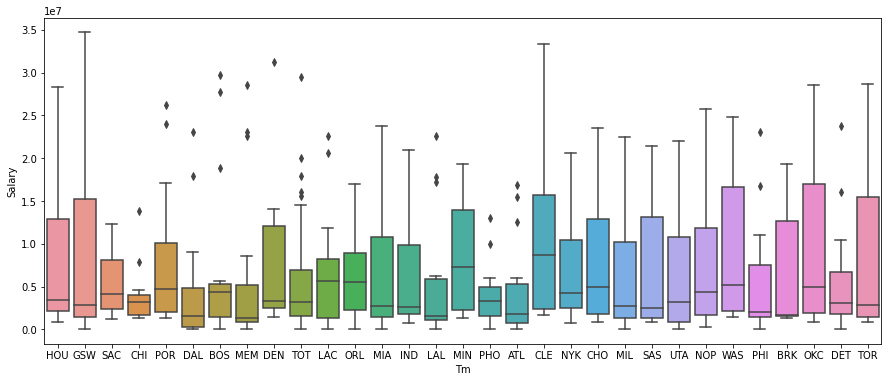

In [268]:
#Show boxplot of each teams salaries
plt.figure(figsize=(15,6))
sns.boxplot(x='Tm',y='Salary',data=df)

Player salary

In [269]:
# make new dataframe with Salary Team and Player as features
TS= df[["Salary", 'Tm','Player']]
TS.head()

,Salary,Tm,Player
0,815615,HOU,Zhou Qi
1,3477600,GSW,Zaza Pachulia
2,12307692,SAC,Zach Randolph
3,3202217,CHI,Zach LaVine
4,3057240,POR,Zach Collins


Show highest paid players

In [270]:
# top 10 highest paid player
TS.nlargest(10,'Salary')

,Salary,Tm,Player
69,34682550,GSW,Stephen Curry
193,33285709,CLE,LeBron James
113,31269231,DEN,Paul Millsap
327,29727900,BOS,Gordon Hayward
451,29512900,TOT,Blake Griffin
204,28703704,TOR,Kyle Lowry
88,28530608,OKC,Russell Westbrook
153,28530608,MEM,Mike Conley
295,28299399,HOU,James Harden
386,27739975,TOR,DeMar DeRozan


Oldest and youngest  players

In [271]:
#oldest players
df[['Age','Tm','Player']].nlargest(10,'Age')

,Age,Tm,Player
20,41,SAC,Vince Carter
179,40,SAS,Manu Ginobili
284,40,MIL,Jason Terry
368,39,DAL,Dirk Nowitzki
410,38,IND,Damien Wilkins
23,37,MIA,Udonis Haslem
101,37,DEN,Richard Jefferson
115,37,SAS,Pau Gasol
138,37,OKC,Nick Collison
300,37,MIN,Jamal Crawford


In [272]:
#youngest players
df[['Age','Tm','Player']].nsmallest(10,'Age')

,Age,Tm,Player
60,19,OKC,Terrance Ferguson
170,19,PHI,Markelle Fultz
180,19,CHO,Malik Monk
279,19,BOS,Jayson Tatum
287,19,BRK,Jarrett Allen
318,19,IND,Ike Anigbogu
341,19,NYK,Frank Ntilikina
4,20,POR,Zach Collins
46,20,UTA,Tony Bradley
54,20,MIL,Thon Maker


Correlation between features


In [273]:
# correlation between values
corr=df.corr()
corr

,Salary,NBA_DraftNumber,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
Salary,1.000000,-0.377613,0.333062,0.289581,0.502698,0.263789,0.168393,-0.073408,0.021337,0.008958,0.187055,0.136193,0.265976,0.027099,0.038723,-0.036521,0.314703,0.560286,0.501564,0.589558,0.154551,0.261018,0.172201,0.311808,0.572085
NBA_DraftNumber,-0.377613,1.000000,0.014687,-0.295199,-0.361973,-0.205337,-0.121213,0.195439,0.053856,-0.052874,-0.196351,-0.159992,-0.157736,-0.054064,-0.112864,0.106459,-0.231728,-0.275754,-0.355379,-0.332983,-0.101699,-0.162479,-0.207774,-0.237703,-0.273677
Age,0.333062,0.014687,1.000000,0.064607,0.067255,-0.005341,0.063010,0.075900,-0.046143,-0.056137,-0.041938,-0.052405,0.086875,-0.062847,-0.063336,0.069743,-0.042412,0.129003,0.039457,0.105699,0.010381,0.050175,-0.027090,0.033483,0.080815
G,0.289581,-0.295199,0.064607,1.000000,0.871115,0.206493,0.276332,-0.031608,-0.091897,-0.062226,0.149409,0.076114,0.180650,0.010358,0.041371,-0.118019,0.051104,0.495140,0.708825,0.622826,0.163934,0.292930,0.370111,0.427260,0.399863
MP,0.502698,-0.361973,0.067255,0.871115,1.000000,0.277656,0.250791,0.003149,-0.060683,-0.122103,0.110882,0.023197,0.310174,0.053052,-0.029116,-0.115355,0.271701,0.655690,0.819555,0.778864,0.171285,0.358478,0.289494,0.451626,0.608306
PER,0.263789,-0.205337,-0.005341,0.206493,0.277656,1.000000,0.764739,-0.144308,0.106316,0.222101,0.204440,0.242104,0.231723,0.068953,0.236694,-0.104378,0.469657,0.429757,0.333277,0.432244,0.931640,0.909342,0.072562,0.856584,0.405077
TS%,0.168393,-0.121213,0.063010,0.276332,0.250791,0.764739,1.000000,-0.082693,0.185091,0.160287,0.094610,0.140397,0.056966,-0.107140,0.168286,0.079859,0.166311,0.348622,0.241651,0.339709,0.765043,0.774214,0.046859,0.722813,0.262391
3PAr,-0.073408,0.195439,0.075900,-0.031608,0.003149,-0.144308,-0.082693,1.000000,-0.246778,-0.620083,-0.411286,-0.558433,-0.054167,-0.047505,-0.408086,-0.257780,-0.088850,-0.107429,-0.140460,-0.130116,-0.000294,0.162141,-0.342344,-0.002316,-0.091930
FTr,0.021337,0.053856,-0.046143,-0.091897,-0.060683,0.106316,0.185091,-0.246778,1.000000,0.161694,0.178644,0.195857,-0.005003,-0.091778,0.101591,0.193656,0.021810,0.077249,0.009911,0.059855,0.105031,0.024046,0.025988,0.033345,0.075783
ORB%,0.008958,-0.052874,-0.056137,-0.062226,-0.122103,0.222101,0.160287,-0.620083,0.161694,1.000000,0.537783,0.813999,-0.274549,-0.078625,0.551151,0.103499,-0.044918,0.110228,0.085119,0.111246,0.134446,-0.037180,0.276731,0.087103,0.104159


Heatmap of correlation

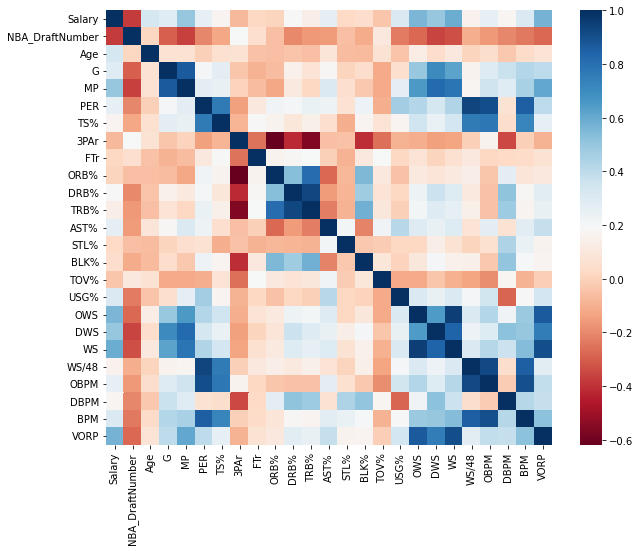

In [274]:
#heatmap of correlation between features
plt.figure(figsize=(10,8))
sns.heatmap(corr,cmap='RdBu')

Show regplot of highly correlated values

In [275]:
#make new datafram with highest correlations shown in heatmap
High_cor=df[['NBA_DraftNumber','TS%','PER','WS/48','VORP','BPM','MP','OBPM','DWS','DRB%','TRB%']]
High_cor.corr()

,NBA_DraftNumber,TS%,PER,WS/48,VORP,BPM,MP,OBPM,DWS,DRB%,TRB%
NBA_DraftNumber,1.000000,-0.121213,-0.205337,-0.101699,-0.273677,-0.237703,-0.361973,-0.162479,-0.355379,-0.196351,-0.159992
TS%,-0.121213,1.000000,0.764739,0.765043,0.262391,0.722813,0.250791,0.774214,0.241651,0.094610,0.140397
PER,-0.205337,0.764739,1.000000,0.931640,0.405077,0.856584,0.277656,0.909342,0.333277,0.204440,0.242104
WS/48,-0.101699,0.765043,0.931640,1.000000,0.278787,0.857656,0.171285,0.923123,0.237197,0.112235,0.140346
VORP,-0.273677,0.262391,0.405077,0.278787,1.000000,0.521540,0.608306,0.389245,0.754267,0.284225,0.246931
BPM,-0.237703,0.722813,0.856584,0.857656,0.521540,1.000000,0.451626,0.899855,0.501563,0.181973,0.167626
MP,-0.361973,0.250791,0.277656,0.171285,0.608306,0.451626,1.000000,0.358478,0.819555,0.110882,0.023197
OBPM,-0.162479,0.774214,0.909342,0.923123,0.389245,0.899855,0.358478,1.000000,0.302527,-0.047949,-0.046497
DWS,-0.355379,0.241651,0.333277,0.237197,0.754267,0.501563,0.819555,0.302527,1.000000,0.362107,0.291679
DRB%,-0.196351,0.094610,0.204440,0.112235,0.284225,0.181973,0.110882,-0.047949,0.362107,1.000000,0.926893


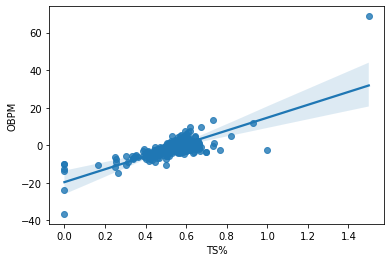

In [276]:
#Regression plot of TS and OBPM
sns.regplot(x='TS%',y='OBPM',data=df)

Find correlation coefficient and p_value

In [277]:
# Correlation coefficient and p_value of TS% and OBPM
pearson_coef,p_value=stats.pearsonr(df['TS%'],df['OBPM'])
print('correlation_coef:',pearson_coef,'p_value:',p_value)

correlation_coef: 0.7742138888694496 p_value: 5.231181302396266e-97


correlation_coef: 0.931639551947622 p_value: 2.801045081442192e-212


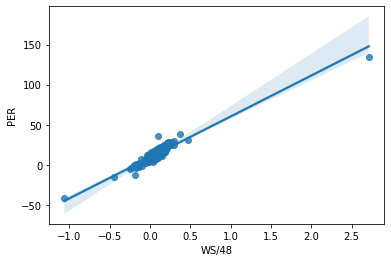

In [278]:
# Correlation coefficient and p_value of WS/48 and PER
pearson_coef,p_value=stats.pearsonr(df['WS/48'],df['PER'])
print('correlation_coef:',pearson_coef,'p_value:',p_value)
sns.regplot(x='WS/48',y='PER',data=df)

correlation_coef: 0.9231227267271969 p_value: 1.5134596546526684e-200


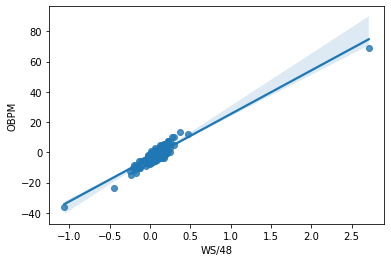

In [279]:
# Correlation coefficient and p_value of WS/48 and OBPM
pearson_coef,p_value=stats.pearsonr(df['WS/48'],df['OBPM'])
print('correlation_coef:',pearson_coef,'p_value:',p_value)
sns.regplot(x='WS/48',y='OBPM',data=df)

correlation_coef: 0.9268925958755417 p_value: 1.4538900955712066e-205


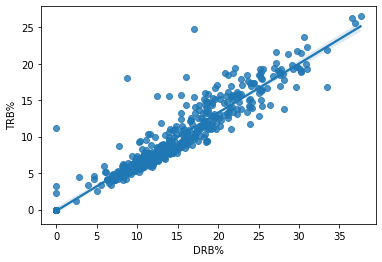

In [280]:
# Correlation coefficient and p_value of DRB% and TRB%
pearson_coef,p_value=stats.pearsonr(df['DRB%'],df['TRB%'])
print('correlation_coef:',pearson_coef,'p_value:',p_value)
sns.regplot(x='DRB%',y='TRB%',data=df)

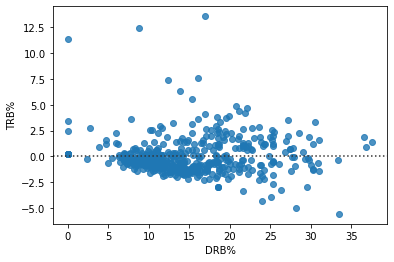

In [387]:
#residual plot
sns.residplot(x='DRB%',y='TRB%',data=df)

In [281]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [346]:
Input=[('scale',StandardScaler()),("polynomial",PolynomialFeatures()),('mode',LinearRegression())]
pipe=Pipeline(Input)

In [347]:
pipe.fit(df[['NBA_DraftNumber','PER','WS/48','VORP','BPM','MP','DRB%','OBPM','TRB%','TS%']],df['Salary'])

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures()),
                ('mode', LinearRegression())])

In [348]:
Z=df[['NBA_DraftNumber','PER','WS/48','VORP','BPM','MP','DRB%','OBPM','TRB%','TS%']]

In [349]:
Z.dtypes

NBA_DraftNumber    float64
PER                float64
WS/48              float64
VORP               float64
BPM                float64
MP                 float64
DRB%               float64
OBPM               float64
TRB%               float64
TS%                float64
dtype: object

In [350]:
Z=Z.astype(float)

In [351]:
Z.dtypes

NBA_DraftNumber    float64
PER                float64
WS/48              float64
VORP               float64
BPM                float64
MP                 float64
DRB%               float64
OBPM               float64
TRB%               float64
TS%                float64
dtype: object

In [352]:
y=df['Salary']

In [353]:
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures()),
                ('mode', LinearRegression())])

In [354]:
ypipe=pipe.predict(Z)

In [355]:
ypipe[0:4]

array([1837444.63705205, 5333247.69125396, 5425890.7270197 ,
       4642606.85175831])

In [357]:
from sklearn.metrics import mean_squared_error

In [358]:
mse=mean_squared_error(df['Salary'],ypipe)
print(mse)

27277278997777.613


In [359]:
lm=LinearRegression()

In [360]:
lm.fit(Z,y)

LinearRegression()

In [361]:
lm.score(Z,y)

0.4138145937538439

In [362]:
yhat=lm.predict(Z)

In [363]:
mse2=mean_squared_error(yhat,y)
print(mse2)

32112267240487.0


In [388]:
from sklearn.metrics import r2_score

In [390]:
r2_score(y,yhat)

0.4138145937538439

Score for predicting salary is low
New target value = PER (player efficienty rating)

In [364]:
Input=[('scale',StandardScaler()),('mode',LinearRegression())]
pipe=Pipeline(Input)

In [365]:
Q=df[['NBA_DraftNumber','WS/48','VORP','BPM','MP','DRB%','OBPM','TRB%','TS%']]

In [366]:
newY=df['PER']

In [367]:
#Change dtype of Q to float
Q=Q.astype(float)

In [368]:
#check dtypes
Q.dtypes

NBA_DraftNumber    float64
WS/48              float64
VORP               float64
BPM                float64
MP                 float64
DRB%               float64
OBPM               float64
TRB%               float64
TS%                float64
dtype: object

In [369]:
pipe.fit(Q,newY)

Pipeline(steps=[('scale', StandardScaler()), ('mode', LinearRegression())])

In [371]:
pipe_predict=pipe.predict(Q)

In [373]:
pipe_predict[0:5]

array([ 0.29211178, 18.35162551, 14.87211821, 11.93149497, 10.47347109])

In [377]:
mse3=mean_squared_error(df['PER'],pipe_predict)
print(mse3)

5.1414851576788765


In [378]:
from sklearn.metrics import r2_score

In [383]:
print(r2_score(newY,pipe_predict))

0.9287501759908715
